In [ ]:
# %%
import numpy as np
np.object= object
np.int = int

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
from plotly import tools
init_notebook_mode(connected=True)

# %%
df = pd.read_csv('data/bank.csv', encoding='utf-8', engine='python')
term_deposits = df.copy()

# %%
df.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


<h3>Khám Phá Các Yếu Tố Cơ Bản</h3>
<a id="overall_analysis"></a>
## Tóm Tắt:
***
<ul>
<li type="square"> <b>Độ tuổi trung bình</b> khoảng 41 tuổi. (Tối thiểu: 18 tuổi và Tối đa: 95 tuổi.)</li><br>
<li type="square"> <b>Số dư trung bình</b> là 1,528. Tuy nhiên, độ lệch chuẩn (std) là một con số khá cao, cho thấy rằng số dư phân bổ rộng rãi trong toàn bộ dữ liệu.</li><br>
<li type="square">Như dữ liệu đã chỉ ra, việc loại bỏ cột <b>thời gian cuộc gọi</b> sẽ hợp lý hơn vì thời gian cuộc gọi có mối tương quan cao với việc khách hàng tiềm năng có mở tài khoản tiết kiệm có kỳ hạn hay không. Ngoài ra, <b>thời gian cuộc gọi được xác định sau khi cuộc gọi đã được thực hiện</b> nên nếu khách hàng mục tiêu chưa từng nhận cuộc gọi thì tính năng này không quá hữu ích. Lý do tại sao thời gian cuộc gọi có mối tương quan mạnh mẽ với việc mở tài khoản tiết kiệm có kỳ hạn là vì khi ngân hàng nói chuyện nhiều hơn với khách hàng mục tiêu, xác suất khách hàng sẽ mở tài khoản tiết kiệm có kỳ hạn càng cao, vì thời gian lâu hơn đồng nghĩa với sự quan tâm (cam kết) cao hơn từ khách hàng tiềm năng.</li><br>
</ul>

**Lưu ý: Không có nhiều thông tin bổ ích mà chúng ta có thể khai thác từ dữ liệu mô tả vì phần lớn dữ liệu mô tả nằm trong các cột "phân loại" chứ không phải trong các cột "số liệu".**


In [2]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000



May mắn là không có giá trị thiếu (missing values).** Nếu có giá trị thiếu, chúng ta sẽ phải điền chúng bằng giá trị trung vị (median), trung bình (mean) hoặc mode (mốt). Cá nhân tôi thường sử dụng trung vị (median), nhưng trong trường hợp này, không cần phải điền giá trị thiếu. Điều này chắc chắn sẽ làm công việc của chúng ta dễ dàng hơn!


In [3]:
# Không có giá trị thiếu 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


C:\Users\thuan\AppData\Local\Temp\ipykernel_8944\3921876597.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



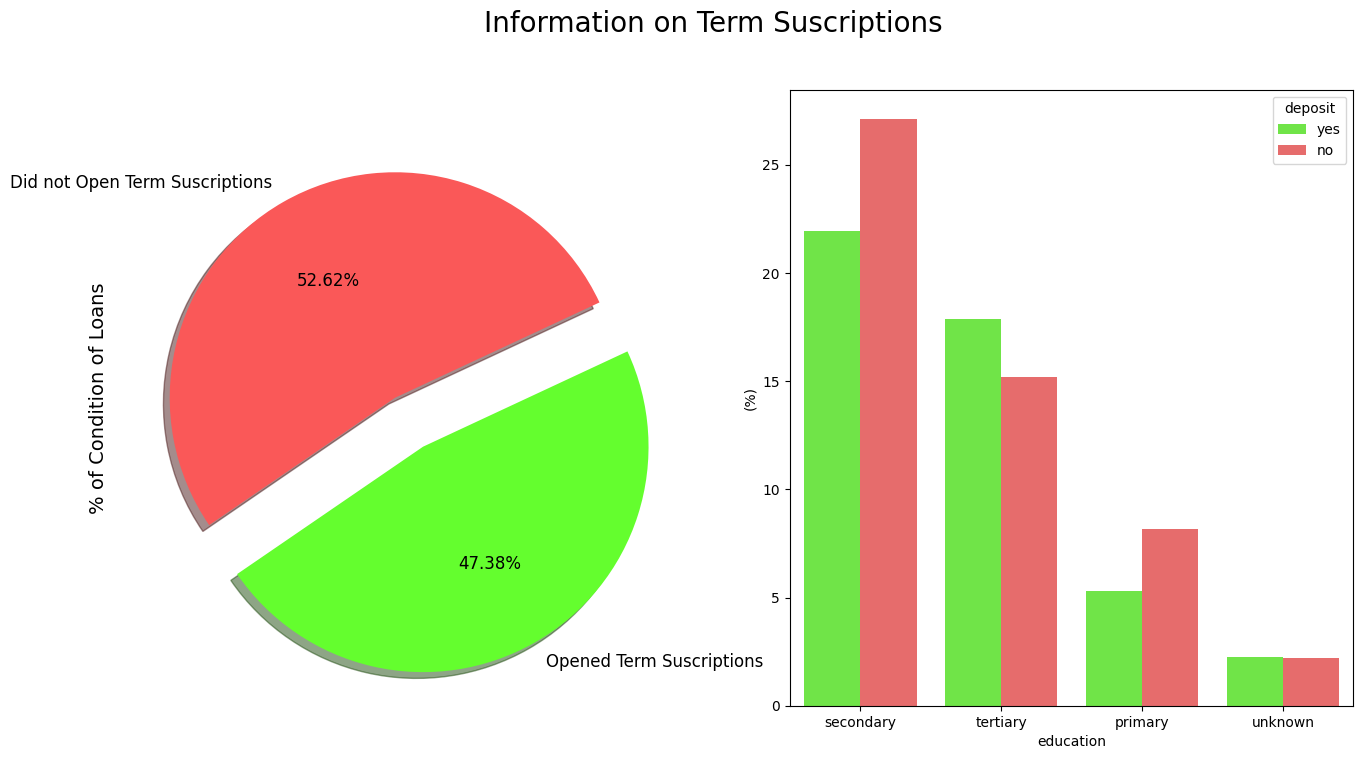

In [ ]:
f, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

df["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x="education", y="balance", hue="deposit", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

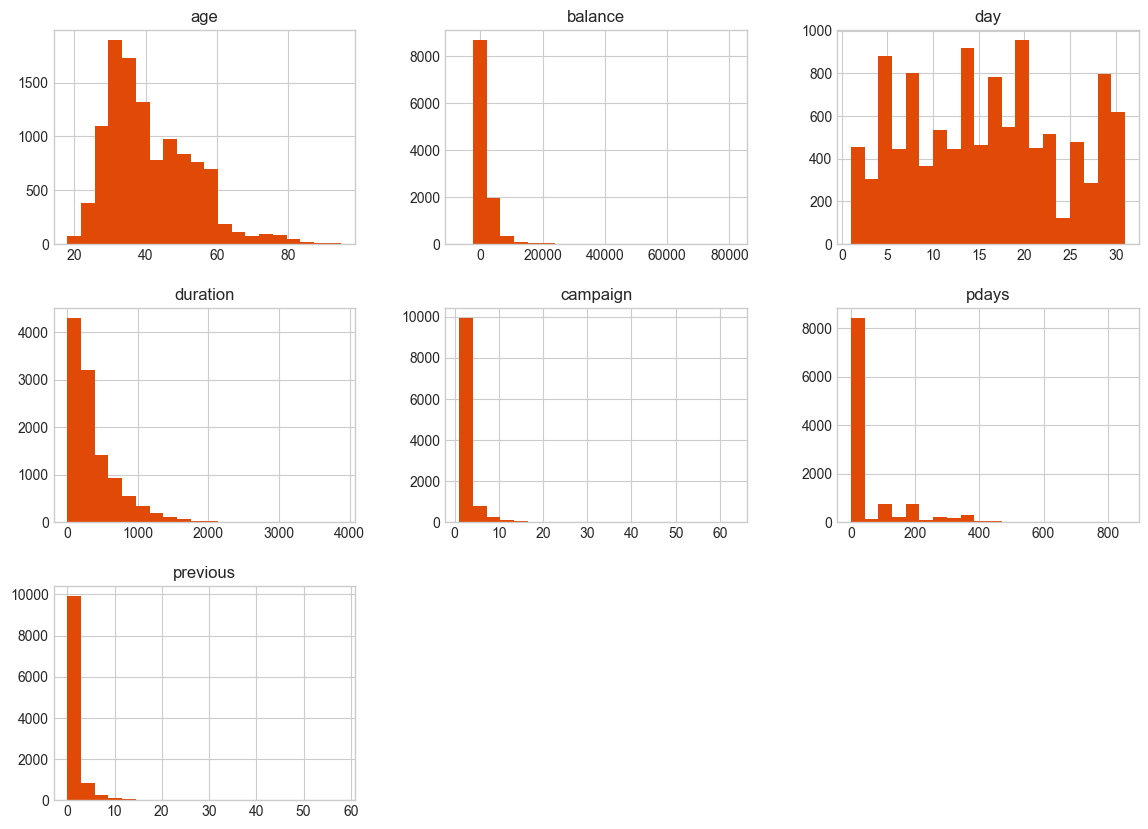

In [7]:
# Hãy xem dữ liệu số được phân phối như thế nào.
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

df.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

In [8]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\3455150037.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



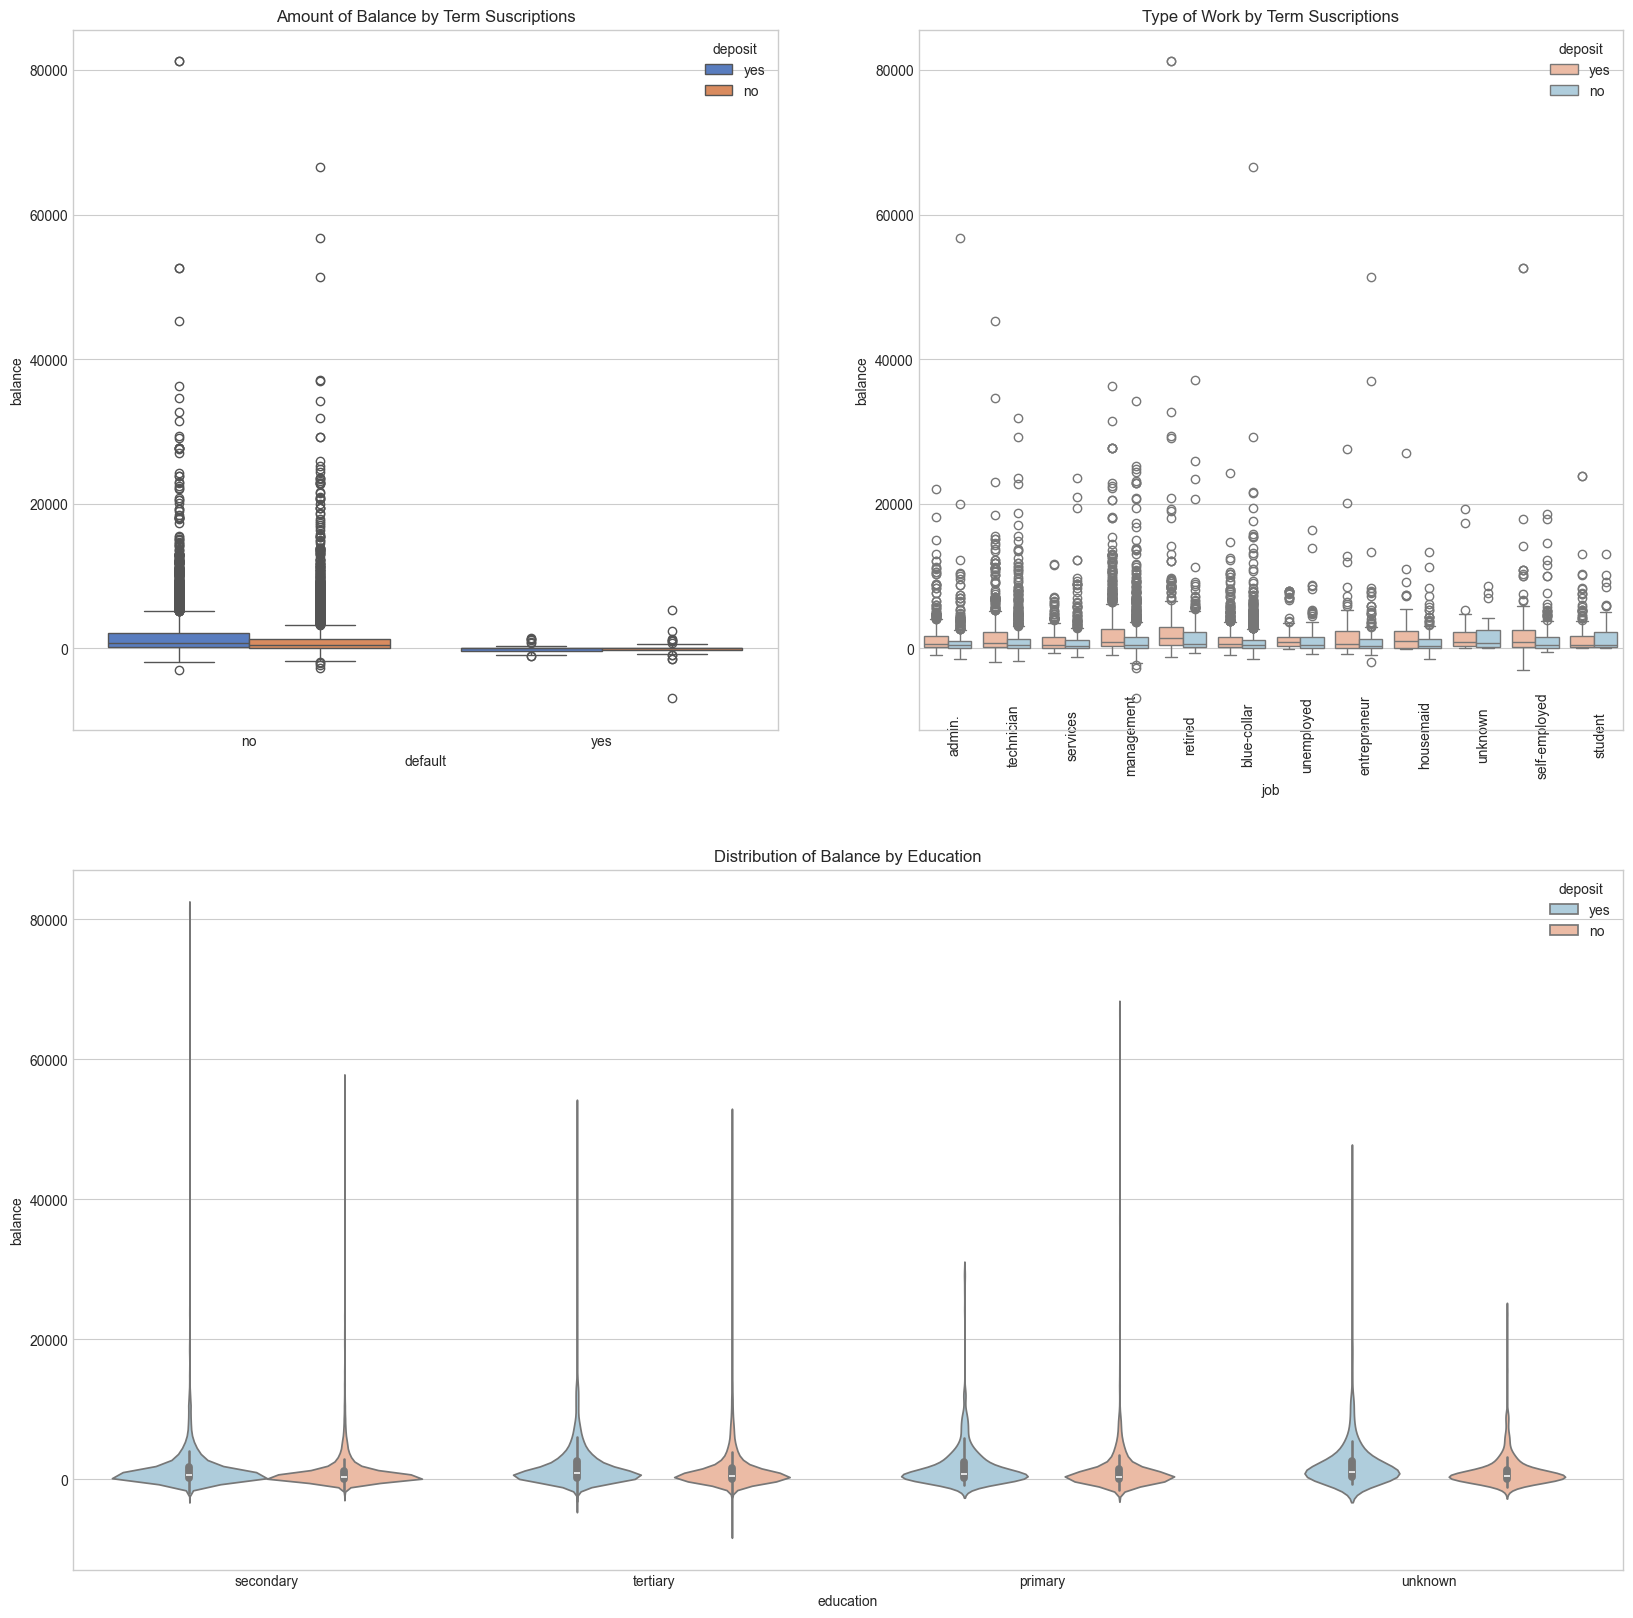

In [9]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes



<h3>Phân Tích Theo Nghề Nghiệp:</h3>
<ul>
    <li><b>Số lượng nghề nghiệp:</b> Nghề quản lý là nghề nghiệp phổ biến nhất trong bộ dữ liệu này.</li>
    <li><b>Độ tuổi theo nghề nghiệp:</b> Như mong đợi, người nghỉ hưu (retired) có độ tuổi trung vị cao nhất, trong khi sinh viên (student) có độ tuổi trung vị thấp nhất.</li>
    <li><b>Số dư tài khoản theo nghề nghiệp:</b> Nghề quản lý (Management) và người nghỉ hưu (Retirees) có số dư tài khoản cao nhất.</li>
</ul>
```


In [11]:
# Loại bỏ các nghề nghiệp có giá trị "Unknown".
df = df.drop(df.loc[df["job"] == "unknown"].index)

# Admin và Management về cơ bản giống nhau, chúng ta sẽ gộp vào cùng một giá trị phân loại.
lst = [df]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [13]:
import squarify
df = df.drop(df.loc[df["balance"] == 0].index)


x = 0
y = 0
width = 100
height = 100

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

In [14]:
# nghề nghiệp nào có xu hướng giữ số dư tài khoản cao hơn.
suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Lấy số dư tài khoản theo nghề nghiệp
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [15]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

# Tạo nhóm phân loại số dư (Balance Category)
df["balance_status"] = np.nan
df.loc[df["balance"] < 0, "balance_status"] = "negative"
df.loc[(df["balance"] >= 0) & (df["balance"] <= 30000), "balance_status"] = "low"
df.loc[(df["balance"] > 30000) & (df["balance"] <= 40000), "balance_status"] = "middle"
df.loc[df["balance"] > 40000, "balance_status"] = "high"

# Tạo các trace
trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    theta=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
           "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(color='rgb(246, 46, 46)')
)

trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    theta=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
           "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(color='rgb(246, 97, 46)')
)

trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    theta=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
           "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(color='rgb(246, 179, 46)')
)

trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    theta=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
           "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(color='rgb(46, 246, 78)')
)

# Layout đúng chuẩn với polar
layout = go.Layout(
    title='Mean Balance in Account<br><i>by Job Occupation</i>',
    font=dict(size=12),
    legend=dict(font=dict(size=14)),
    polar=dict(
        radialaxis=dict(
            ticksuffix=' €',
            showline=True,
            linewidth=1
        ),
        angularaxis=dict(
            direction="clockwise"
        )
    )
)

# Tạo và hiển thị biểu đồ
fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
iplot(fig)


C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\3451285333.py:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'negative' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



<h3>Tình trạng hôn nhân</h3>
Trong phân tích này, chúng tôi không tìm thấy nhiều thông tin đáng chú ý, ngoại trừ việc phần lớn <b>những người đã ly hôn</b> có tình trạng tài chính eo hẹp. Cũng dễ hiểu vì họ phải chia tài sản sau ly hôn! Tuy nhiên, vì không có thêm phát hiện nào nổi bật, chúng tôi sẽ tiếp tục phân cụm tình trạng hôn nhân với trình độ học vấn để xem liệu có thể tìm ra các nhóm đặc trưng khác trong tập mẫu này hay không.


In [16]:
df['marital'].value_counts()

marital
married     5815
single      3336
divorced    1174
Name: count, dtype: int64

In [17]:
df['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [18]:
df['marital'].value_counts().tolist()

[5815, 3336, 1174]

In [19]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

Chương 2 

In [20]:
# Phân phối số dư tài khoản theo tình trạng hôn nhân
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

e:\codepython\venv\Lib\site-packages\plotly\tools.py:453: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [21]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low


In [22]:
# Lưu ý rằng những người đã ly hôn có số dư tài khoản thấp đáng kể.
import plotly.figure_factory as ff
fig = ff.create_facet_grid(
    df,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

In [23]:
#  chúng ta đã bỏ sót một số khách hàng quan trọng với số dư cao.
fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

In [24]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low


<h3>Phân cụm theo Tình trạng hôn nhân và Trình độ học vấn:</h3>

<ul> 
    <li><b>Tình trạng hôn nhân:</b> Như đã đề cập trước đó, việc ly hôn có ảnh hưởng đáng kể đến số dư tài khoản của cá nhân.</li>
    <li><b>Trình độ học vấn:</b> Trình độ học vấn cũng ảnh hưởng lớn đến số dư tài khoản của khách hàng tiềm năng.</li>
    <li><b>Khoản vay:</b> Việc khách hàng tiềm năng có từng vay vốn trước đó hay chưa cũng ảnh hưởng đáng kể đến số dư tài khoản của họ.</li>
</ul>


In [25]:

df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [26]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\2894269200.py:5: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'single/primary' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low,married/tertiary


e:\codepython\venv\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


e:\codepython\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


e:\codepython\venv\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


e:\codepython\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0;

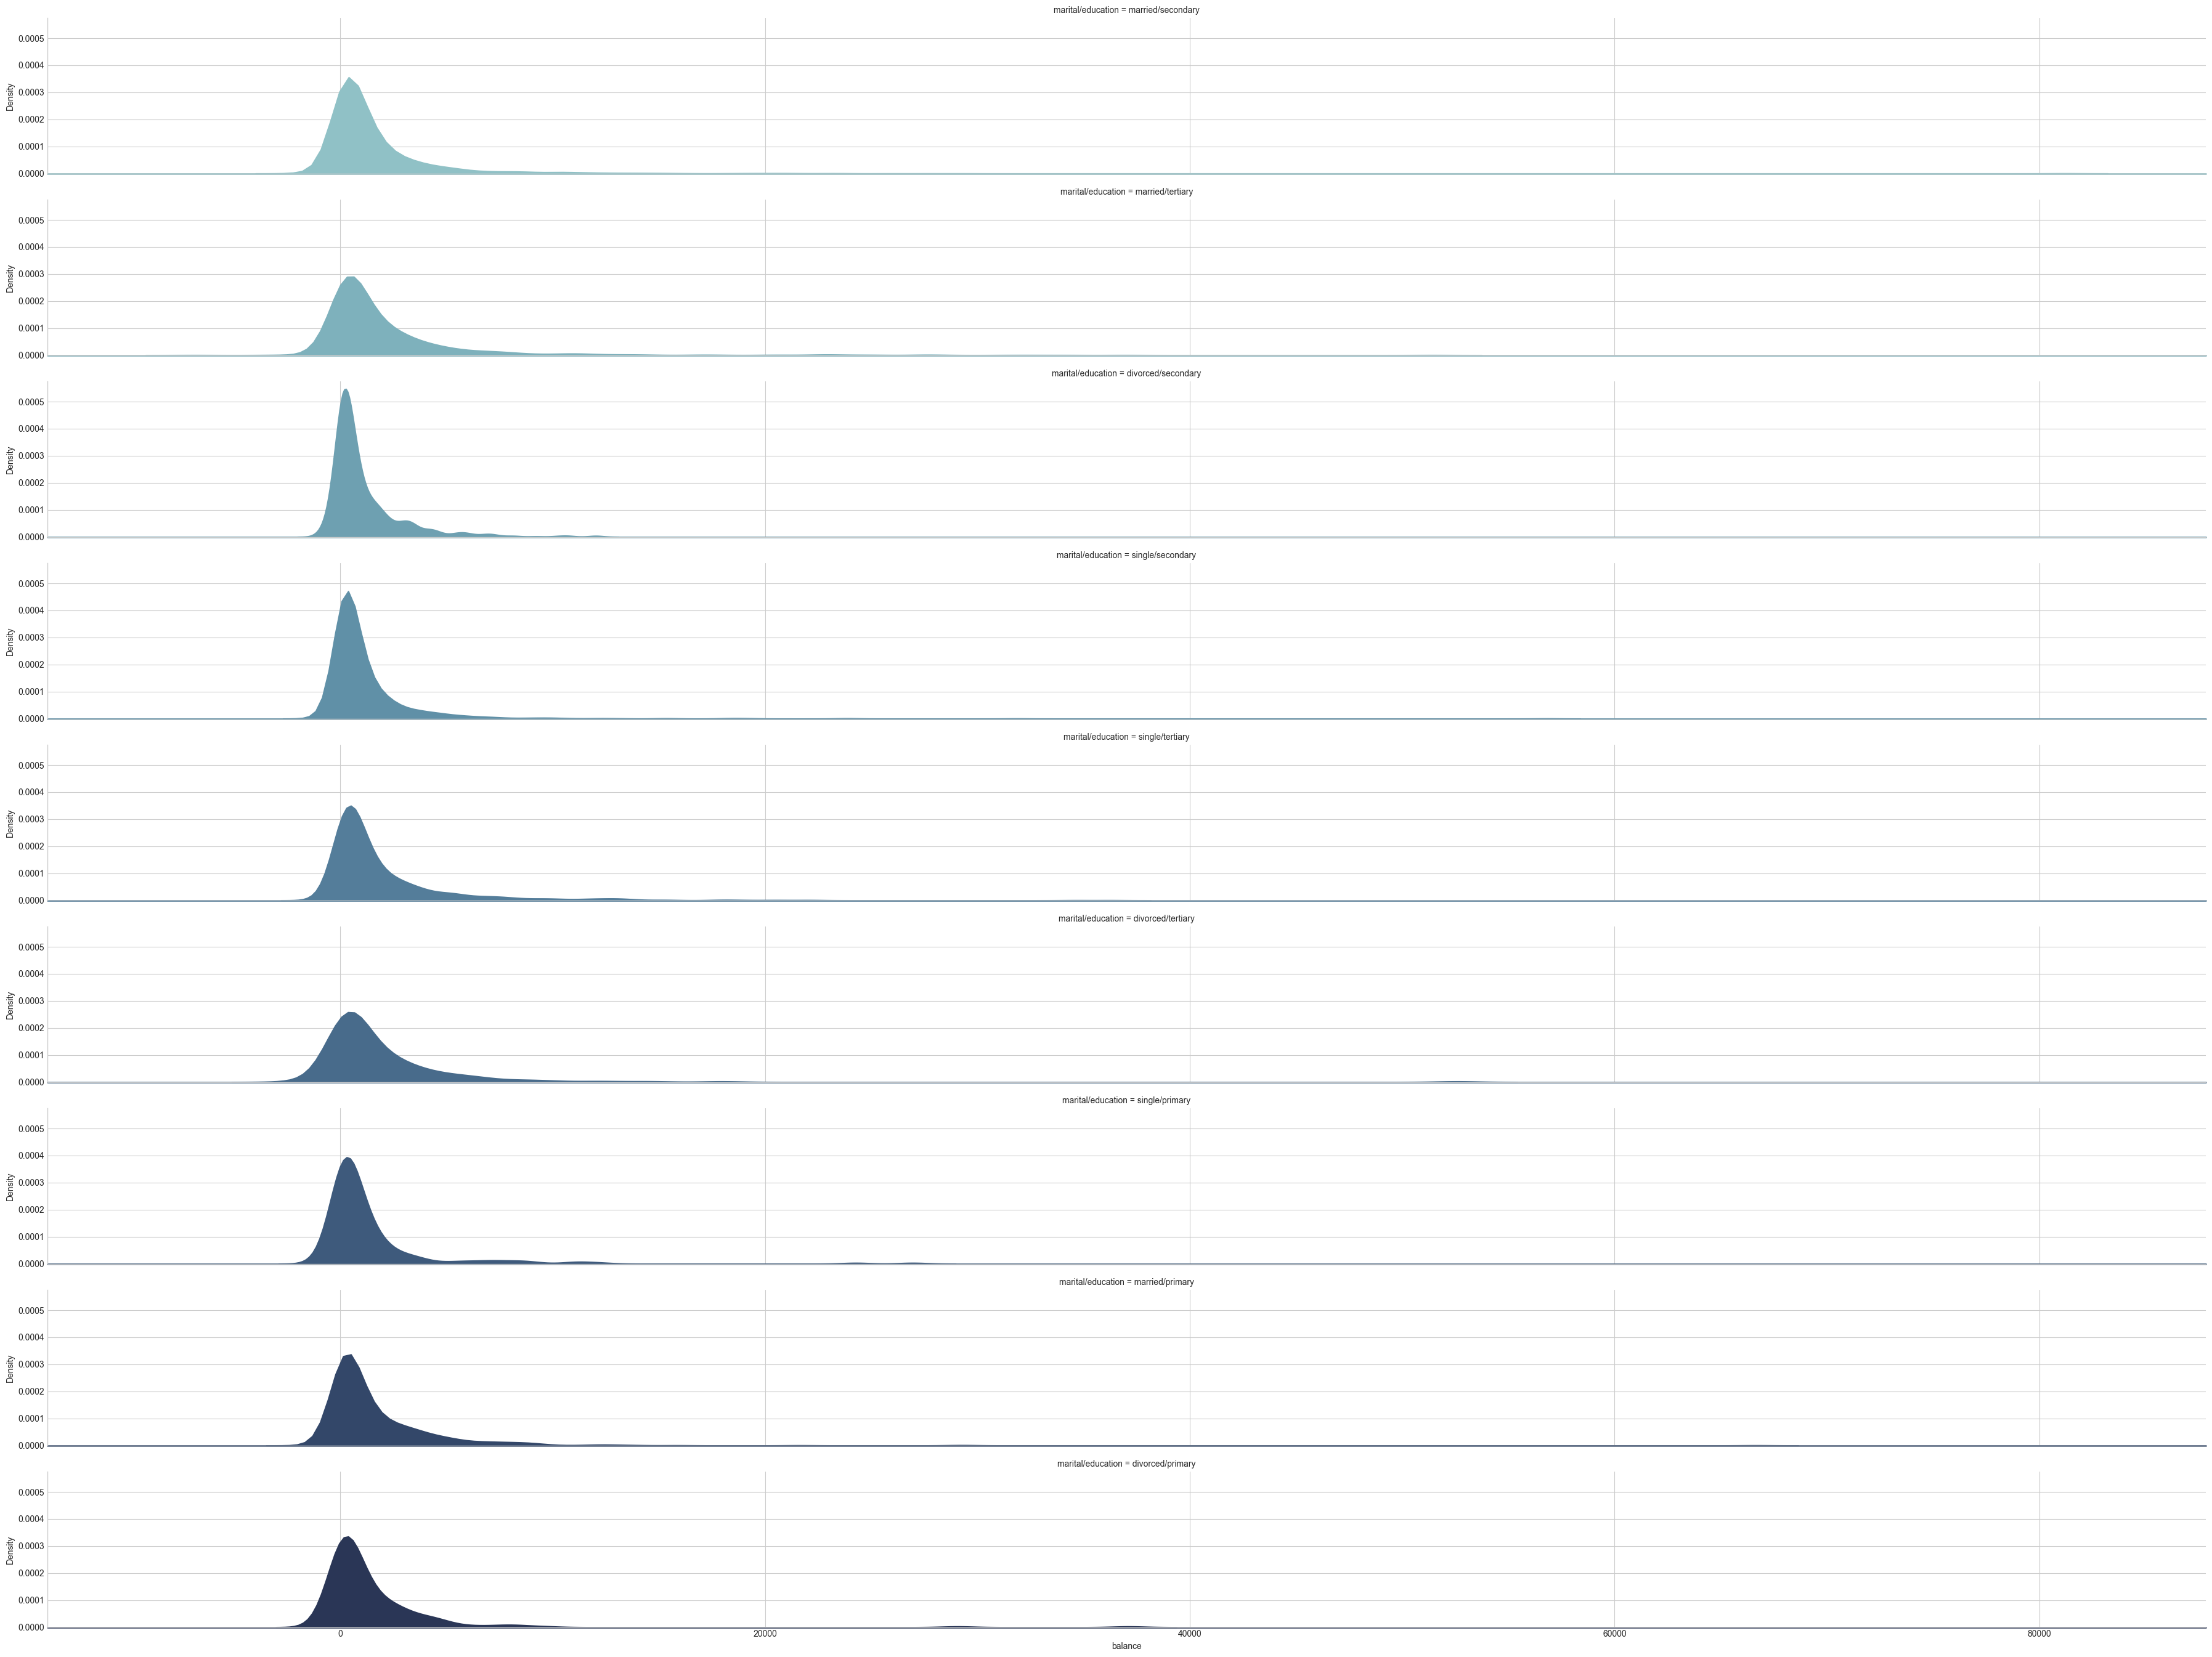

In [27]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\3037191660.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

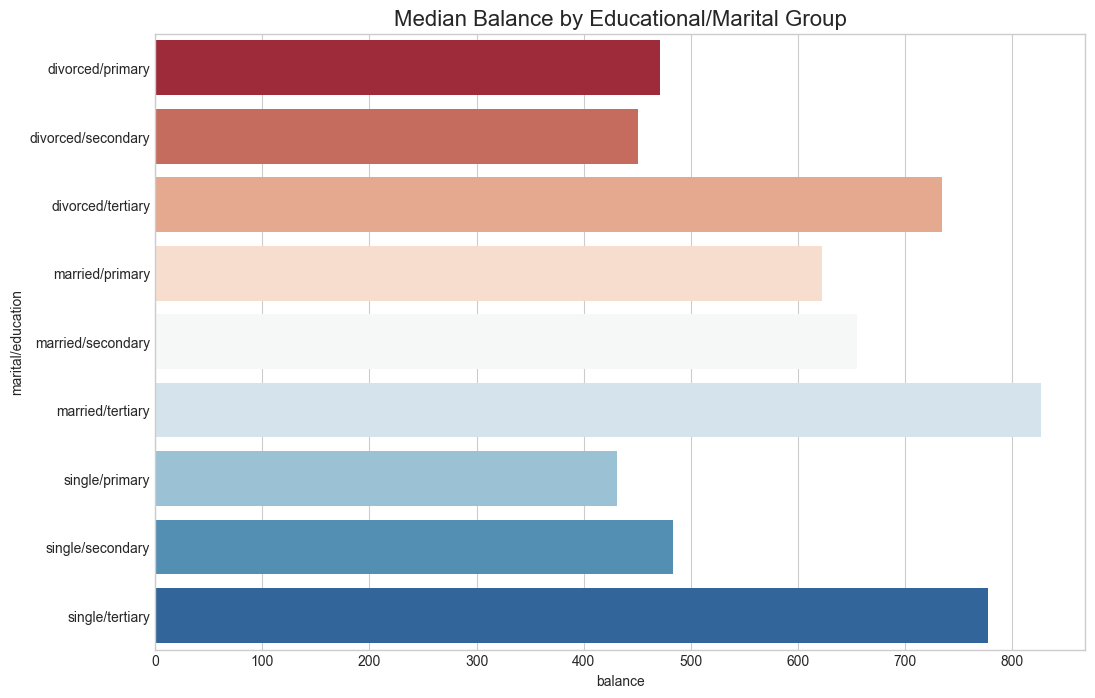

In [28]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [29]:
# Hãy xem nhóm khách hàng có khoản vay trong phân nhóm theo tình trạng hôn nhân và trình độ học vấn.

loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title=dict(
        text="The Impact of Loans to Married/Educational Clusters",
        font=dict(
            color='rgb(204, 204, 204)'
        )
    ),
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont=dict(
            color='rgb(102, 102, 102)'
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=True
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)

In [30]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low,married/tertiary


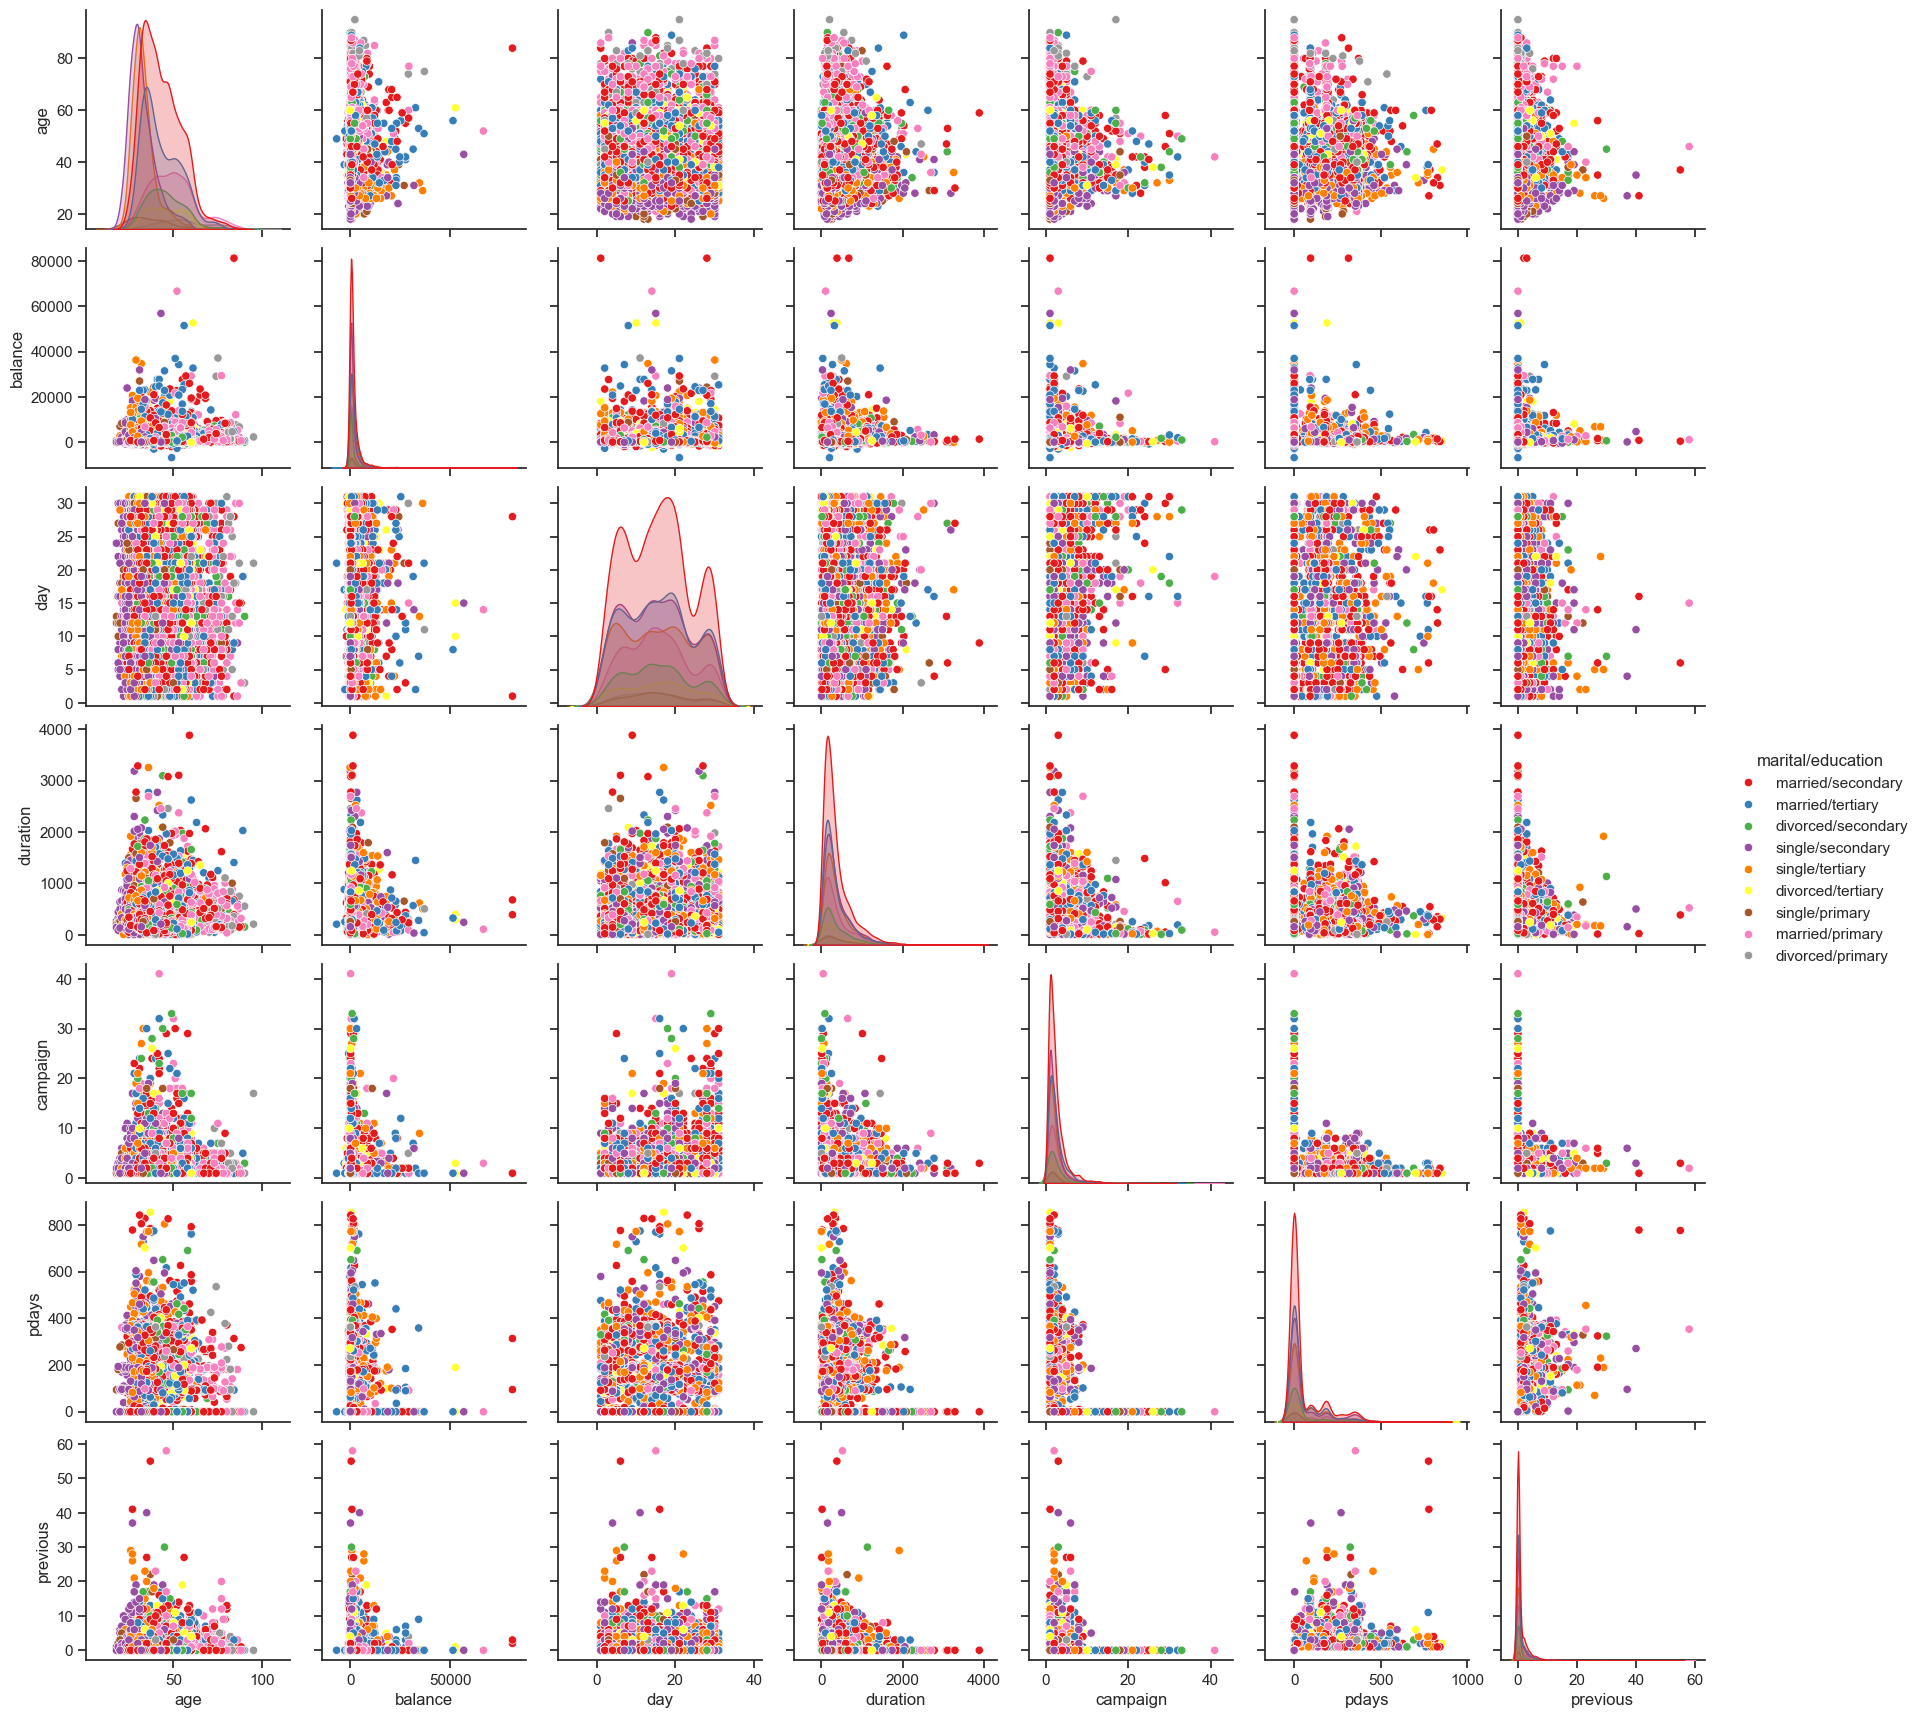

In [31]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="marital/education", palette="Set1")
plt.show()

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low,married/secondary
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low,married/secondary
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low,married/tertiary


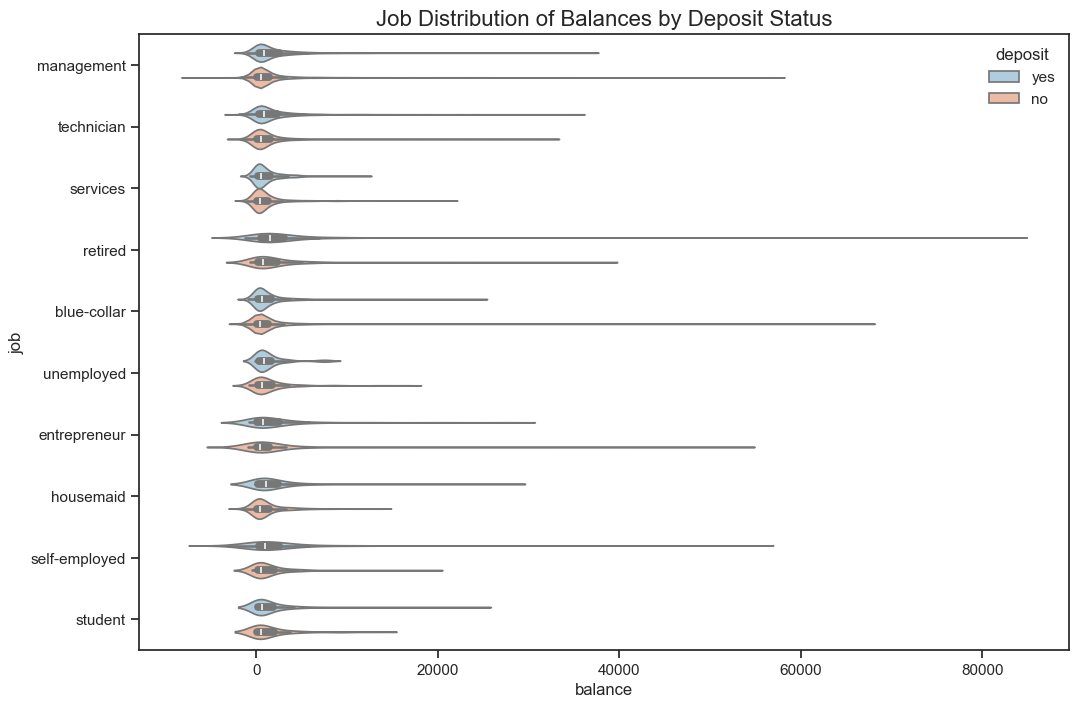

In [33]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

<h3><b>Thời lượng chiến dịch:</b> </h3>
<ul>
    <li><b>Thời lượng chiến dịch:</b> Chúng tôi nhận thấy thời lượng có mối tương quan cao với việc mở tài khoản tiết kiệm có kỳ hạn — thời lượng càng dài thì khả năng khách hàng mở tài khoản càng cao.</li>
    <li><b>Thời lượng trung bình chiến dịch:</b> Thời lượng trung bình là 374,76. Hãy xem liệu những khách hàng có thời lượng vượt mức trung bình này có xu hướng mở tài khoản tiết kiệm nhiều hơn không.</li>
    <li><b>Tình trạng thời lượng:</b> Những người có thời lượng cao hơn mức trung bình có tỷ lệ mở tài khoản cao hơn. 78% nhóm này đã mở tài khoản tiết kiệm, trong khi chỉ 32% nhóm dưới mức trung bình làm điều đó. Điều này cho thấy nên tập trung vào nhóm khách hàng có thời lượng tương tác cao hơn mức trung bình.</li>
</ul>


In [34]:
df.drop(['marital/education', 'balance_status'], axis=1, inplace=True)

In [35]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,management,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,management,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,management,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


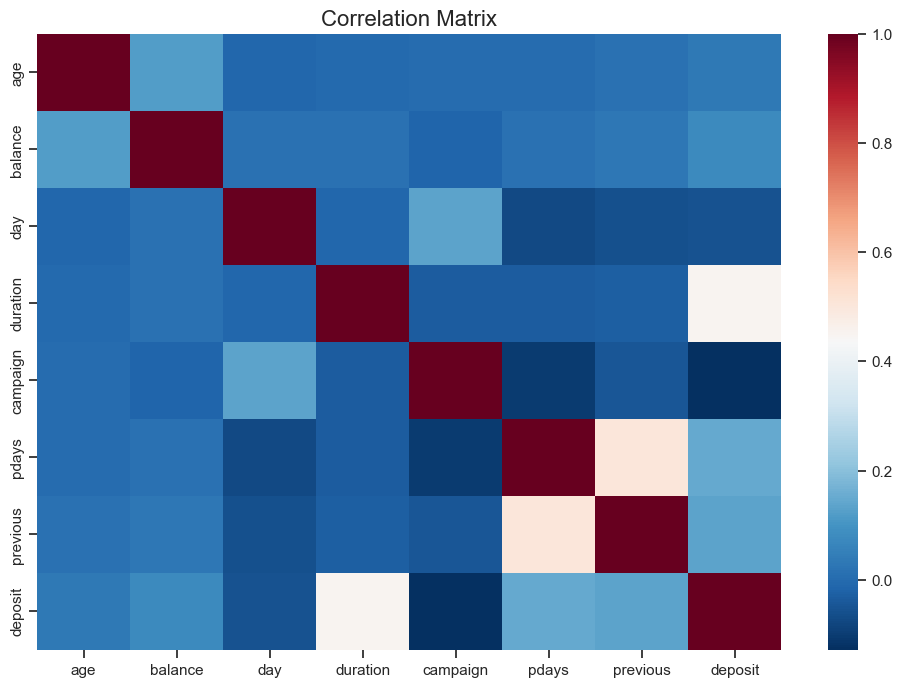

In [36]:
#Bỏ cột tình trạng hôn nhân, trình độ học vấn và trạng thái số dư
#Chuẩn hóa cả dữ liệu số và dữ liệu phân loại
#Dùng ma trận tương quan
#Từ đó xác định xem thời lượng có ảnh hưởng đến việc mở tài khoản tiết kiệm kỳ hạn hay không

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# tách khung data
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\1879032717.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'below_average' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



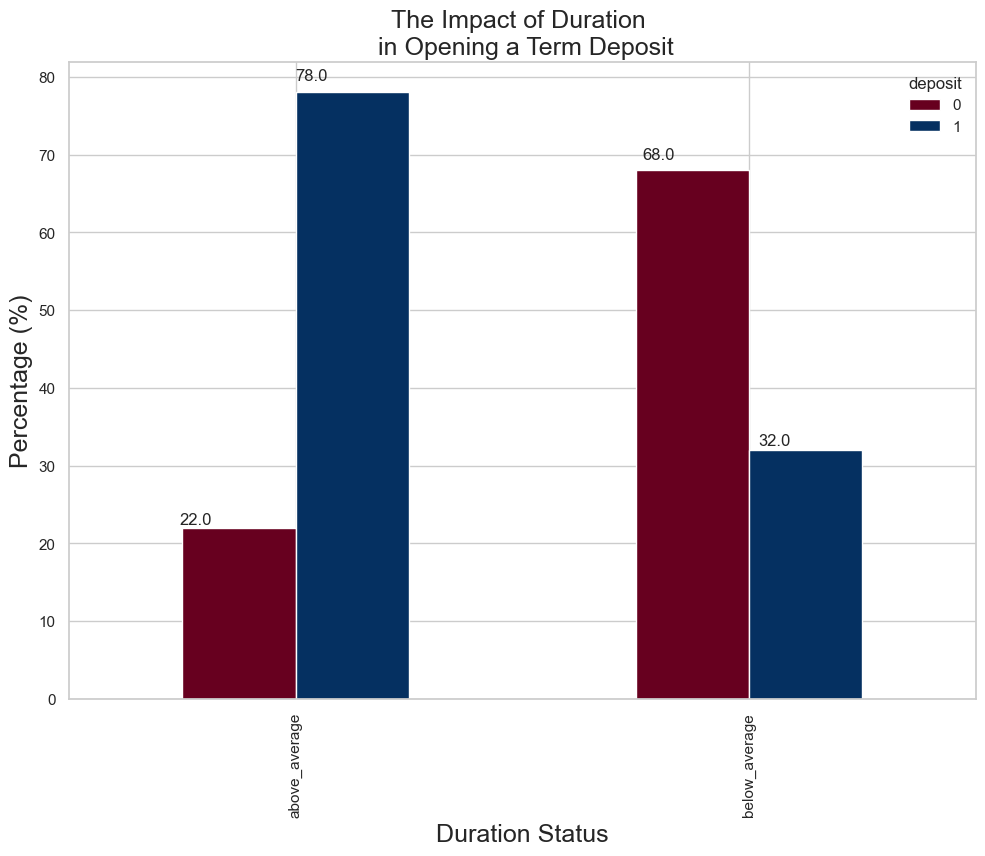

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

<h2><b>Mô hình Phân loại:</b></h2>


In [38]:
dep = term_deposits['deposit']
term_deposits.drop(labels=['deposit'], axis=1,inplace=True)
term_deposits.insert(0, 'deposit', dep)
term_deposits.head()
#Housing có tương quan âm -20% với việc mở tài khoản tiết kiệm, hãy xem cách phân phối của nó.
#52%
term_deposits["housing"].value_counts()/len(term_deposits)

housing
no     0.526877
yes    0.473123
Name: count, dtype: float64

In [39]:
term_deposits["loan"].value_counts()/len(term_deposits)

loan
no     0.869199
yes    0.130801
Name: count, dtype: float64

<h2>Stratified Sampling:</h2>
<p>Stratified Sampling là một khái niệm quan trọng thường bị bỏ qua khi phát triển mô hình hồi quy hoặc phân loại. Để tránh overfitting, chúng ta phải áp dụng cross-validation, đồng thời đảm bảo rằng ít nhất các đặc trưng có ảnh hưởng lớn nhất đến nhãn (khách hàng có mở tài khoản tiết kiệm hay không) được phân phối đều. Ý tôi là gì?</p>

<p><b>Khoản vay cá nhân:</b><br>
Ví dụ, khoản vay cá nhân là đặc trưng quan trọng quyết định khách hàng có mở tài khoản tiết kiệm hay không. Để xác nhận điều này, bạn có thể kiểm tra ma trận tương quan phía trên và thấy nó có tương quan -11% với việc mở tài khoản. Vậy trước khi áp dụng stratified sampling trên tập dữ liệu train và test, chúng ta cần làm gì?</p>

<ol>
    <li>Xem phân phối dữ liệu của chúng ta.</li>
    <li>Nhận thấy cột khoản vay có 87% là "không" (không có khoản vay cá nhân) và 13% là "có".</li>
    <li>Đảm bảo tập train và test giữ nguyên tỷ lệ 87% "không" và 13% "có".</li>
</ol>


In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
# Ở đây, chúng ta chia dữ liệu thành tập huấn luyện và kiểm tra đồng thời áp dụng stratified shuffle split.
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits["loan"]):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]
    
stratified_train["loan"].value_counts()/len(df)
stratified_test["loan"].value_counts()/len(df)

loan
no     0.196219
yes    0.029519
Name: count, dtype: float64

In [41]:
# Tách nhãn (labels) và đặc trưng (features).
train_data = stratified_train # Tạo bản sao của tập huấn luyện stratified.
test_data = stratified_test
train_data.shape
test_data.shape
train_data['deposit'].value_counts()

deposit
no     4697
yes    4232
Name: count, dtype: int64

In [42]:
# Định nghĩa lớp CategoricalEncoder, sao chép từ PR #9151.
# Chỉ cần chạy cell này hoặc chép vào code, không cần hiểu hết từng dòng.
# Tham khảo mã từ sách Hands on Machine Learning with Scikit Learn and Tensorflow của Aurelien Geron.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Đặt các dòng bị lỗi thành giá trị chấp nhận được và tiếp tục
                    # sau ta đánh dấu X_mask và sẽ bị loại bỏ sau.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

# Lớp để chọn các cột số hoặc cột phân loại
# vì Scikit-Learn hiện chưa hỗ trợ xử lý trực tiếp DataFrame.
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8929 entries, 9867 to 9672
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deposit    8929 non-null   object
 1   age        8929 non-null   int64 
 2   job        8929 non-null   object
 3   marital    8929 non-null   object
 4   education  8929 non-null   object
 5   default    8929 non-null   object
 6   balance    8929 non-null   int64 
 7   housing    8929 non-null   object
 8   loan       8929 non-null   object
 9   contact    8929 non-null   object
 10  day        8929 non-null   int64 
 11  month      8929 non-null   object
 12  duration   8929 non-null   int64 
 13  campaign   8929 non-null   int64 
 14  pdays      8929 non-null   int64 
 15  previous   8929 non-null   int64 
 16  poutcome   8929 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [46]:
import numpy as np
print(np.__version__)


2.2.6


In [47]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\2375581196.py:152: DeprecationWarning:

`in1d` is deprecated. Use `np.isin` instead.

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\2375581196.py:152: DeprecationWarning:

`in1d` is deprecated. Use `np.isin` instead.

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\2375581196.py:152: DeprecationWarning:

`in1d` is deprecated. Use `np.isin` instead.

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\2375581196.py:152: DeprecationWarning:

`in1d` is deprecated. Use `np.isin` instead.

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\2375581196.py:152: DeprecationWarning:

`in1d` is deprecated. Use `np.isin` instead.

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\2375581196.py:152: DeprecationWarning:

`in1d` is deprecated. Use `np.isin` instead.

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\2375581196.py:152: DeprecationWarning:

`in1d` is deprecated. Use `np.isin` instead.

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\237558

array([[ 1.14643868,  1.68761105,  1.69442818, ...,  0.        ,
         0.        ,  1.        ],
       [-0.86102339, -0.35066205, -0.5560058 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.94466765, -0.20504785,  0.39154535, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.86102339, -0.26889658, -1.02978138, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.2263519 , -0.32166951,  0.50998924, ...,  0.        ,
         0.        ,  1.        ],
       [-0.61009063, -0.34740446,  1.69442818, ...,  1.        ,
         0.        ,  0.        ]], shape=(8929, 51))

In [48]:
y_train = train_data['deposit']
y_test = test_data['deposit']
y_train.shape

(8929,)

In [49]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

array([False, False,  True, ...,  True,  True, False], shape=(8929,))

In [50]:
some_instance = X_train[1250]

In [51]:
# Thời gian cho các mô hình phân loại
import time
t_start = time.perf_counter()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}

In [52]:

no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [53]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\3285976239.py:12: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Logistic Regression' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



trained Logistic Regression in 0.02 s
trained Nearest Neighbors in 0.00 s
trained Linear SVM in 0.91 s
trained Gradient Boosting Classifier in 0.98 s
trained Decision Tree in 0.05 s
trained Random Forest in 0.12 s
trained Neural Net in 1.30 s
trained Naive Bayes in 0.00 s
                     classifier  train_score  training_time
4                 Decision Tree     1.000000       0.048418
5                 Random Forest     0.998432       0.117072
2                    Linear SVM     0.881958       0.905390
1             Nearest Neighbors     0.863255       0.000546
3  Gradient Boosting Classifier     0.861463       0.977029
6                    Neural Net     0.854519       1.296505
0           Logistic Regression     0.830776       0.018325
7                   Naive Bayes     0.721693       0.004312


<h3>Tránh Overfitting:</h3>
<p><b>Mô tả ngắn về Overfitting?</b><br>
Đây là lỗi trong thuật toán mô hình khi nó học cả những nhiễu ngẫu nhiên trong dữ liệu thay vì chỉ học mẫu chung. Bạn có thể thấy điều này khi mô hình đạt điểm rất cao trên tập huấn luyện nhưng lại cho kết quả rất kém trên tập kiểm tra (dữ liệu mới). Nguyên nhân thường do overfitting — tức là mô hình học quá kỹ các nhiễu trong dữ liệu. Mục tiêu là mô hình chỉ nắm được mẫu tổng thể để phân loại chính xác khách hàng có mở tài khoản tiết kiệm hay không. Trong ví dụ trên, khả năng cao Decision Tree và Random Forest đang overfit vì điểm chính xác gần như tuyệt đối (100% và 99%).</p>

<p><b>Làm sao để tránh Overfitting?</b><br>
Cách tốt nhất là dùng cross-validation. Ví dụ, chia tập huấn luyện thành 3 phần, sử dụng 2/3 (66%) để huấn luyện và 1/3 (33%) để kiểm tra, lặp lại quá trình 3 lần. Thuật toán sẽ chạy qua tất cả các tập huấn luyện và kiểm tra nhằm nắm bắt mẫu tổng thể của dữ liệu.</p>


In [54]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [55]:
# Tất cả các mô hình đều hoạt động tốt nhưng tôi sẽ chọn GradientBoosting.
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
1,SVC,0.851831
7,Naives Bayes,0.847576
6,Neural Classifier,0.847576
4,Grad B CLF,0.844440
5,Rand FC,0.839512
0,Logistic Reg.,0.828312
2,KNN,0.804569
3,Dec Tree,0.783515


# Confusion Matrix: 
<a id="confusion"></a>
<img src="https://computersciencesource.files.wordpress.com/2010/01/conmat.png">

## Insights of a Confusion Matrix: 
The main purpose of a confusion matrix is to see how our model is performing when it comes to classifying potential clients that are likely to suscribe to a term deposit. We will see in the confusion matrix four terms the True Positives, False Positives, True Negatives and False Negatives.<br><br>

**Positive/Negative:** Type of Class (label) ["No", "Yes"]
**True/False:** Correctly or Incorrectly classified by the model.<br><br>

**True Negatives (Top-Left Square):** This is the number of **correctly** classifications of the "No" class or potenial clients that are **not willing** to suscribe a term deposit. <br><br>

**False Negatives (Top-Right Square):** This is the number of **incorrectly** classifications of the "No" class or potential clients that are **not willing** to suscribe a term depositt. <br><br>

**False Positives (Bottom-Left Square):** This is the number of **incorrectly** classifications of the "Yes" class or potential clients that are **willing** to suscribe a term deposit. <br><br>

**True Positives (Bottom-Right Square):** This is the number of **correctly** classifications of the "Yes" class or potenial clients that are **willing** to suscribe a term deposit.

In [56]:
# Đánh giá chéo mô hình Gradient Boosting Classifier của chúng ta
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

In [57]:
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)
print ("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

Gradient Boost Classifier accuracy is 0.84


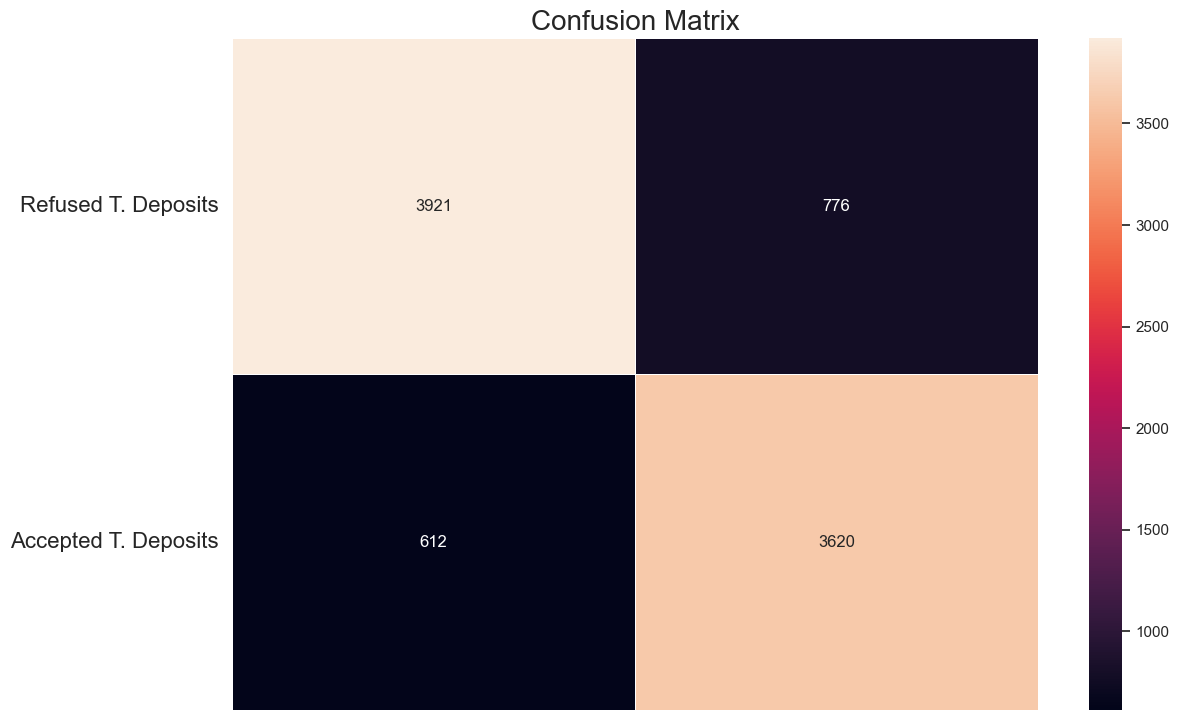

In [58]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

# Precision and Recall:
<a id="precision_recall"></a>
Recall: Là tổng số mẫu có nhãn "Yes" trong tập dữ liệu được mô hình phát hiện đúng. Tức là mô hình phát hiện được bao nhiêu trường hợp "Yes".
<br><br>
Precision: Cho biết mức độ chắc chắn của mô hình khi dự đoán rằng một mẫu là "Yes", tức là trong số các dự đoán "Yes", có bao nhiêu là đúng thực sự.

Mối Quan Hệ Giữa Recall và Precision:
Khi precision tăng thì recall thường giảm, và ngược lại.
Ví dụ: Nếu tăng precision từ 30% lên 60%, nghĩa là mô hình chỉ chọn những trường hợp mà nó chắc chắn 60% trở lên là "Yes".
Nếu có một trường hợp mà mô hình chỉ chắc chắn 58%, thì nó sẽ dự đoán là "No" — mặc dù thực tế đó là một "Yes" (khách hàng đã đăng ký tiền gửi).
=> Vì vậy, precision càng cao thì mô hình càng dễ bỏ sót các trường hợp thực sự là "Yes"!

In [59]:
#  tính điểm số cho độ chính xác (precision) và khả năng nhận diện (recall).
from sklearn.metrics import precision_score, recall_score
#Mô hình chắc chắn 77% rằng khách hàng tiềm năng sẽ đăng ký tiền gửi có kỳ hạn.
#Mô hình chỉ giữ lại được 60% khách hàng đồng ý đăng ký tiền gửi có kỳ hạn.
print('Precision Score: ', precision_score(y_train, y_train_pred))
# Bộ phân loại chỉ phát hiện được 60% khách hàng tiềm năng sẽ đăng ký tiền gửi có kỳ hạn.
print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.8234758871701547
Recall Score:  0.8553875236294896


In [60]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.8391284191006027

In [61]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

array([-3.65645629])

In [62]:
# Tăng ngưỡng dự đoán sẽ làm giảm khả năng nhận diện (recall).
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [63]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, X_train, y_train, cv=3, method="predict_proba")

In [64]:
# khắc phục lỗi #9589 phát sinh trong Scikit-Learn phiên bản 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]
    
if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [65]:
y_scores.shape

(8929,)

In [66]:
# How can we decide which threshold to use? We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

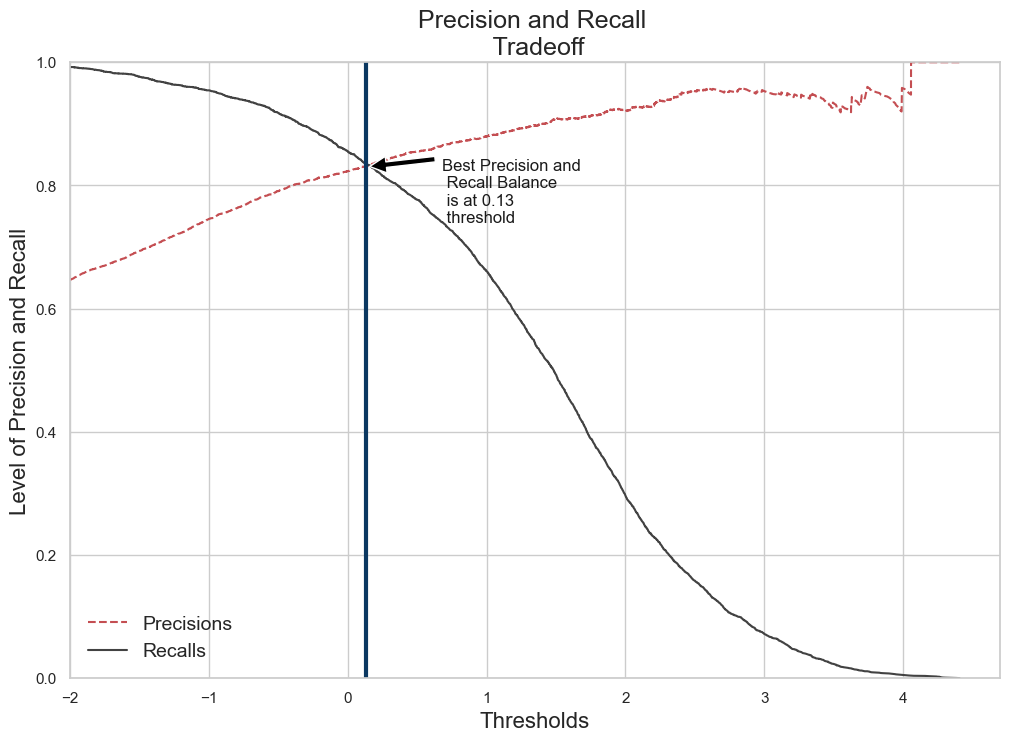

In [67]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

# ROC Curve (Receiver Operating Characteristic):
The **ROC curve** tells us how well our classifier is classifying between term deposit suscriptions (True Positives) and non-term deposit suscriptions. The **X-axis** is represented by False positive rates (Specificity) and the **Y-axis** is represented by the True Positive Rate (Sensitivity.) As the line moves the threshold of the classification changes giving us different values. The closer is the line to our top left corner the better is our model separating both classes.


In [68]:
from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

C:\Users\thuan\AppData\Local\Temp\ipykernel_2532\2266021114.py:4: MatplotlibDeprecationWarning:

Passing label as a length 8852 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.



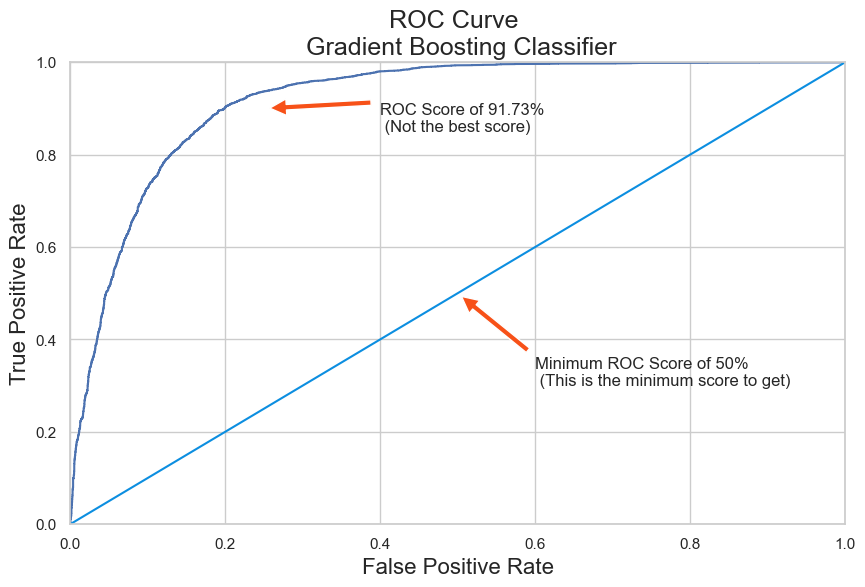

In [69]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [70]:
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

Gradient Boost Classifier Score:  0.9174192351390282
Neural Classifier Score:  0.9156542425624207
Naives Bayes Classifier:  0.8033675317833489


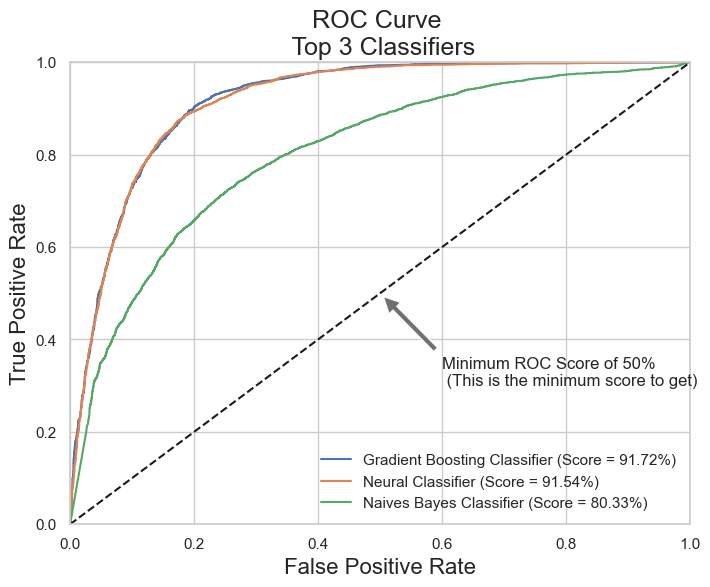

In [71]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 91.72%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 91.54%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 80.33%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

In [72]:
grad_clf.predict_proba([some_instance])

array([[0.97482622, 0.02517378]])

In [73]:
# Let's see what does our classifier predict.
grad_clf.predict([some_instance]) 

array([0])

In [74]:
y_train[1250]

np.int64(0)

Những Yếu Tố Ảnh Hưởng Đến Kết Quả Đăng Ký Tiền Gửi Có Kỳ Hạn
DecisionTreeClassifier:
<a id="decision"></a>
Ba đặc trưng quan trọng nhất đối với mô hình phân loại của chúng tôi là:

Duration (thời lượng cuộc trò chuyện giữa nhân viên bán hàng và khách hàng tiềm năng),

Contact (số lần liên hệ với khách hàng tiềm năng trong cùng một chiến dịch marketing),

Month (tháng trong năm).

Feature ranking:
1. feature 11 (0.591310)
2. feature 8 (0.129966)
3. feature 6 (0.067020)
4. feature 13 (0.049923)
5. feature 15 (0.038138)
6. feature 14 (0.037830)
7. feature 10 (0.026646)
8. feature 5 (0.025842)
9. feature 0 (0.017757)
10. feature 12 (0.007889)
11. feature 3 (0.005280)
12. feature 9 (0.002200)
13. feature 2 (0.000147)
14. feature 1 (0.000050)
15. feature 4 (0.000000)
16. feature 7 (0.000000)


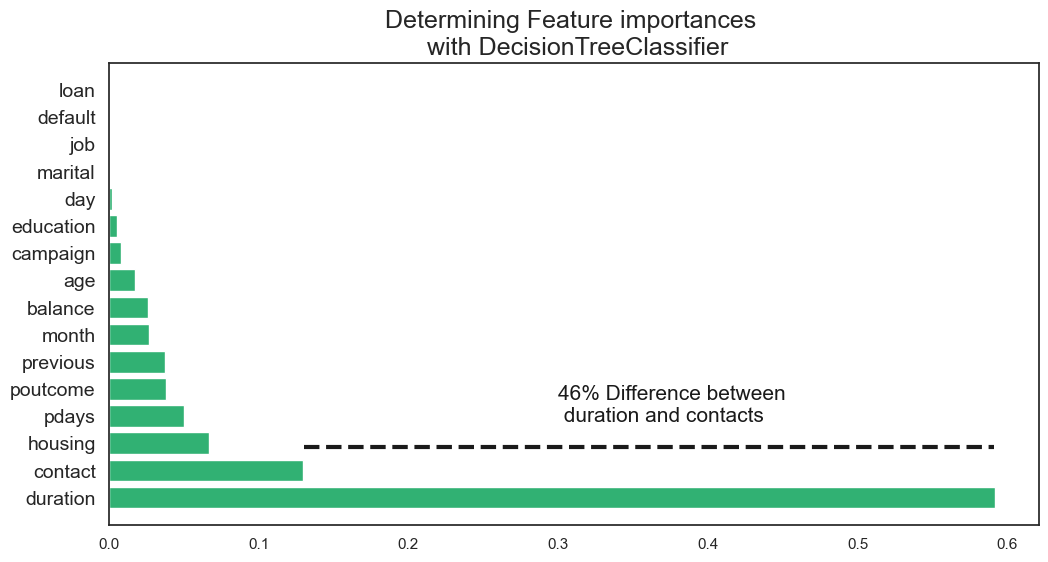

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
sns.set(style="white")


# Convert the columns into categorical variables
term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes

# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'deposit'
X = term_deposits.drop('deposit', axis=1)


label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)



tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

## GradientBoosting Classifier Wins!
Gradient Boosting classifier is the best model to predict whether or not a **potential client** will suscribe to a term deposit or not.  84% accuracy!

In [76]:
# Our three classifiers are grad_clf, nav_clf and neural_clf
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('gbc', grad_clf), ('nav', nav_clf), ('neural', neural_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('nav', GaussianNB()),
                             ('neural', MLPClassifier(alpha=1))],
                 voting='soft')

In [77]:
from sklearn.metrics import accuracy_score

for clf in (grad_clf, nav_clf, neural_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

GradientBoostingClassifier 0.8463949843260188
GaussianNB 0.7514554411106136
MLPClassifier 0.7044334975369458
VotingClassifier 0.8051948051948052


# What Actions should the Bank Consider?
<a id="bank_actions"></a>
<img src="https://media.giphy.com/media/l46Cy1rHbQ92uuLXa/giphy.gif">


## Solutions for the Next Marketing Campaign (Conclusion):
1) **Months of Marketing Activity:** We saw that the the month of highest level of marketing activity was the month of **May**. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of **March, September, October and December.** (December should be under consideration because it was the month with the lowest marketing activity, there might be a reason why december is the lowest.)<br><br>
2) **Seasonality:** Potential clients opted to suscribe term deposits during the seasons of **fall** and **winter**. The next marketing campaign should focus its activity throghout these seasons. <br><br>
3) **Campaign Calls:** A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the likely he or she will decline to open a term deposit. <br><br>
4) **Age Category:** The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of suscribing to a term deposit while the eldest category had a 76% chance of suscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions. <br><br>
5) **Occupation:** Not surprisingly, potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution. After that time the individual gets its capital back and its interest made on the loan. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.<br><br>
6) **House Loans and Balances:** Potential clients in the low balance and no balance category were more likely to have a house loan than people in the average and high balance category. What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account. However, we see that potential clients in the average and hih balances are less likely to have a house loan and therefore, more likely to open a term deposit. Lastly, the next marketing campaign should focus on individuals of average and high balances in order to increase the likelihood of suscribing to a term deposit. <br><br>

7) **Develop a Questionaire during the Calls:** Since duration of the call is the feature that most positively correlates with whether a potential client will open a term deposit or not, by providing an interesting questionaire for potential clients during the calls the conversation length might increase. Of course, this does not assure us that the potential client will suscribe to a term deposit! Nevertheless, we don't loose anything by implementing a strategy that will increase the level of engagement of the potential client leading to an increase probability of suscribing to a term deposit, and therefore an increase in effectiveness for the next marketing campaign the bank will excecute. <br><br>

8) <b>Target individuals with a higher duration (above 375): </b> Target the target group that is above average in duration, there is a highly likelihood that this target group would open a term deposit account. The likelihood that this group would open a term deposit account is at 78% which is pretty high. This would allow that the success rate of the next marketing campaign would be highly successful.<br><br>

By combining all these strategies and simplifying the market audience the next campaign should address, it is likely that the next marketing campaign of the bank will be more effective than the current one.






# References:
1) Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron.<br>
2) Special Thanks to Ahmet Taspinar. (Insights on a handul of functions) Link: http://ataspinar.com/2017/05/26/classification-with-scikit-learn/ <br>
3) Special Thanks to Randy Lao and his Predicting Employee KernelOver work. Link: https://www.kaggle.com/randylaosat/predicting-employee-kernelover